# Mobile Price Classifier, using Machine Learning
## By Debjit Ganguli, Debdyuti Saha, Chhandak Patra, Protyush Mukherjee and Aniruddha Poddar
## Guided by Prof. Debayan Ganguly

The dataset used for the project can be found at: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

Mobile phone is a device which was invented as an compact alternative to telephones and which has since evolved to the point that we not only have smartphones, but we also cannot imagine life without a mobile. With so many mobiles companies to choose from, we need something to tell us if the price of the mobile is justified for its features. This is where this project comes in, we take a dataset of mobile phones and their features along with a price range. We create a Machine Learning model to predict the price range of a mobile based on its feature, using the data of the previous mobile phones in our dataset. The models we use are: Linear Regression, Logistic Regression, Random Forest Classifier and KNN Classifier. We check the accuracy for each and choose the model with the most accuracy. In our dataset, we have a train file and a test file. But the test file has no data for price range, so we have to split the training data into training data and testing data to find the accuracy of the models. We will use the test dataset to predict the price range of those mobiles and compare some features with the training dataset to check if our model works as expected. Let's take this opportunity to explore the columns in the dataset.
1. battery_power - The total energy that can be stored by the mobile battery, in mAh
2. blue - Indicates whether the phone has bluetooth or not(0 for no, 1 for yes)
3. clock_speed - The speed at which the mobile processor runs
4. dual_sum - Indicates whether the phone has dual sim support or not(0 for no, 1 for yes)
5. fc - The megapixels of the front camera
6. four_g - Indicates whether the phone has 4G support or not(0 for no, 1 for yes)
7. int_memory - Internal memory of the phone, in GB
8. m_dep - Depth of mobile, in cm
9. mobile_wt - Weight of mobile, in grams
10. n_cores - Number of cores of mobile processor
11. pc - The megapixels of the primary or back camera
12. px_height - Pixel resolution height
13. px_width - Pixel resolution width
14. ram - RAM capacity, in MB
15. sc_h - Screen height
16. sc_w - Screen width
17. talktime - The longest time that one battery charge will last
18. three_g - Indicates whether the phone has 3G support or not(0 for no, 1 for yes)
19. touch_screen - Indicates whether the phone has touchscreen or not(0 for no, 1 for yes)
20. wifi - Indicates whether the phone has WiFi support or not(0 for no, 1 for yes)
21. price_range - Indicates the price range the mobile belongs to(0 for cheap, 1 for average, 2 for expensive, 3 for very expensive)

## Loading packages

We use this section to import some packages that we need. We need pandas and numpy to store the dataset and fetch statistics as required respectively. We use matplotlib and seaborn to plot graphs. We use confusion_matrix to create a confusion matrix for the model we select. The rest of the packages are the Machine Learing models we used, as mentioned earlier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

## Loading the data into a DataFrame
We use read_csv() from pandas to read the csv file into a DataFrame. 

In [2]:
train_data=pd.read_csv('dataset/train.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Does the dataset need to be cleaned?
Let's see!

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


The dataset has a total of 2000 rows, and every column in the dataset has 2000 non-null values. The datatype is consistent too. So, we do not have to preprocess(or clean) the dataset.

## Number of phones in each price range

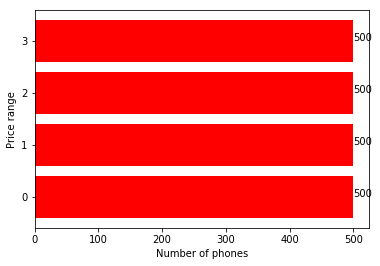

In [4]:
#we get the count of phones in each category using the appropriate conditions and plot them in a bar graph
count0=train_data[train_data.price_range==0].shape[0]
count1=train_data[train_data.price_range==1].shape[0]
count2=train_data[train_data.price_range==2].shape[0]
count3=train_data[train_data.price_range==3].shape[0]
xAxis=["0", "1", "2", "3"]
yAxis=[count0, count1, count2, count3]
plt.barh(xAxis, yAxis, color="red")
for index, value in enumerate(yAxis):
    plt.text(value, index, str(value))
plt.xlabel("Number of phones")
plt.ylabel("Price range")
plt.show()

The 2000 mobiles are evenly spread into 4 price ranges of 500 each. We are working with a very consistent dataset here.

## Number of 4G phones vs 3G phones
A very important factor behind buying a mobile is whether the phone supports 4G. The dataset comes from a time when 3G phones were more prevalent, so we check the exact number of phones that support 4G vs the number that support 3G.

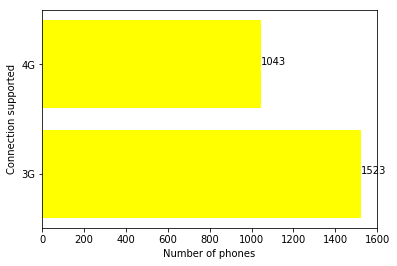

In [5]:
#we get the count of phones in 4G and 3G using the appropriate conditions and plot them in a bar graph
count_4G=train_data[train_data.four_g==1].shape[0]
count_3G=train_data[train_data.three_g==1].shape[0]
xAxis=["3G", "4G"]
yAxis=[count_3G, count_4G]
plt.barh(xAxis, yAxis, color="yellow")
for index, value in enumerate(yAxis):
    plt.text(value, index, str(value))
plt.xlabel("Number of phones")
plt.ylabel("Connection supported")
plt.show()

## Percentage of 4G phones in each price range


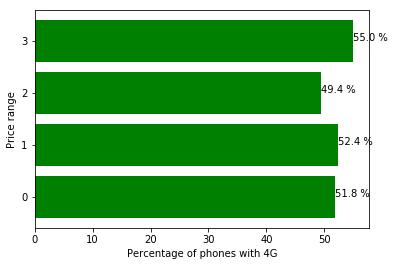

In [6]:
#we get the count of 4G phones in each range using the appropriate conditions, find the percentage 
#and plot them in a bar graph
count4G0=train_data[(train_data.price_range==0) & (train_data.four_g==1)].shape[0]
count4G1=train_data[(train_data.price_range==1) & (train_data.four_g==1)].shape[0]
count4G2=train_data[(train_data.price_range==2) & (train_data.four_g==1)].shape[0]
count4G3=train_data[(train_data.price_range==3) & (train_data.four_g==1)].shape[0]
xAxis=["0", "1", "2", "3"]
yAxis=[count4G0*100/count0, count4G1*100/count1, count4G2*100/count2, count4G3*100/count3]
plt.barh(xAxis, yAxis, color="green")
for index, value in enumerate(yAxis):
    plt.text(value, index, str(value)+" %")
plt.xlabel("Percentage of phones with 4G")
plt.ylabel("Price range")
plt.show()

The graph makes sense, expensive phones tend to be more likely to support 4G than cheaper phones. Category 2 has a lower percentage than 1 and 0, which may owe to the fact that some 3G phones with high specs were released at a higher price.

## Percentage of phones with bluetooth in each price range
Bluetooth is a feature that is very important to phones for sharing media. For such an important feature, prices must fluctuate, right?

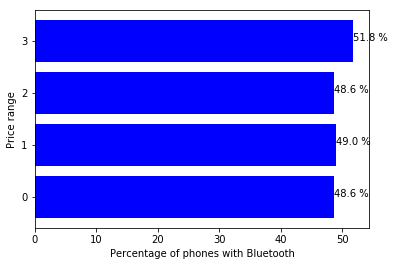

In [7]:
#we get the count of bluetooth phones in each range using the appropriate conditions, find the percentage 
#and plot them in a bar graph
countb0=train_data[(train_data.price_range==0) & (train_data.blue==1)].shape[0]
countb1=train_data[(train_data.price_range==1) & (train_data.blue==1)].shape[0]
countb2=train_data[(train_data.price_range==2) & (train_data.blue==1)].shape[0]
countb3=train_data[(train_data.price_range==3) & (train_data.blue==1)].shape[0]
xAxis=["0", "1", "2", "3"]
yAxis=[countb0*100/count0, countb1*100/count1, countb2*100/count2, countb3*100/count3]
plt.barh(xAxis, yAxis, color='blue')
for index, value in enumerate(yAxis):
    plt.text(value, index, str(value)+" %")
plt.xlabel("Percentage of phones with Bluetooth")
plt.ylabel("Price range")
plt.show()

Again, the graph makes sense since expensive phones are expected to support bluetooth.

## Internal memory at different price ranges
Mobiles of the same model are to have higher prices for higher internal storage. Let us see how each price range fares for internal memory.

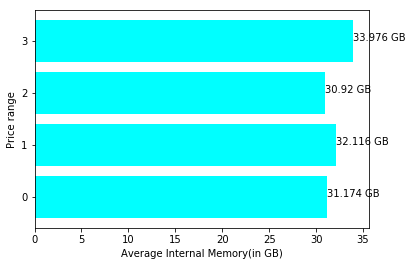

In [8]:
#we get the average internal memory in each range using the appropriate conditions and plot them in a bar graph
int_memory0=train_data[train_data.price_range==0]['int_memory'].mean()
int_memory1=train_data[train_data.price_range==1]['int_memory'].mean()
int_memory2=train_data[train_data.price_range==2]['int_memory'].mean()
int_memory3=train_data[train_data.price_range==3]['int_memory'].mean()
xAxis=["0", "1", "2", "3"]
yAxis=[int_memory0, int_memory1, int_memory2, int_memory3]
plt.barh(xAxis, yAxis, color='cyan')
for index, value in enumerate(yAxis):
    plt.text(value, index, str(value)+" GB")
plt.xlabel("Average Internal Memory(in GB)")
plt.ylabel("Price range")
plt.show()

Internal memory seems to be around the same, slightly more for the very expensive phones. If you pay a higher price, you better get more internal memory.

## Battery power at different price ranges

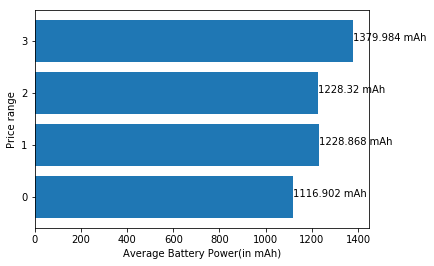

In [9]:
#we get the average battery power in each range using the appropriate conditions and plot them in a bar graph
battery_power0=train_data[train_data.price_range==0]['battery_power'].mean()
battery_power1=train_data[train_data.price_range==1]['battery_power'].mean()
battery_power2=train_data[train_data.price_range==2]['battery_power'].mean()
battery_power3=train_data[train_data.price_range==3]['battery_power'].mean()
xAxis=["0", "1", "2", "3"]
yAxis=[battery_power0, battery_power1, battery_power2, battery_power3]
plt.barh(xAxis, yAxis)
for index, value in enumerate(yAxis):
    plt.text(value, index, str(value)+" mAh")
plt.xlabel("Average Battery Power(in mAh)")
plt.ylabel("Price range")
plt.show()

As price increases, so does the battery power. 

## Processor clock speed at different price ranges

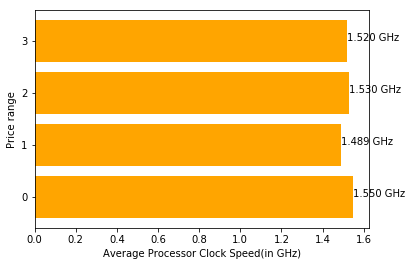

In [10]:
#we get the average processor clock speed in each range using the appropriate conditions and plot them in a bar graph
clock_speed0=train_data[train_data.price_range==0]['clock_speed'].mean()
clock_speed1=train_data[train_data.price_range==1]['clock_speed'].mean()
clock_speed2=train_data[train_data.price_range==2]['clock_speed'].mean()
clock_speed3=train_data[train_data.price_range==3]['clock_speed'].mean()
xAxis=["0", "1", "2", "3"]
yAxis=[clock_speed0, clock_speed1, clock_speed2, clock_speed3]
plt.barh(xAxis, yAxis, color='orange')
for index, value in enumerate(yAxis):
    plt.text(value, index, "{:.3f}".format(value)+" GHz")
plt.xlabel("Average Processor Clock Speed(in GHz)")
plt.ylabel("Price range")
plt.show()

Here we see something unusual, the cheap phones have a higher average clock speed than the expensive and very expensive phones. Here is a mythbuster, the performance of a processor does not depend only on clock speed. In fact, expensive processors have less clock speed than a cheaper processor. To make up for the performance, expensive processors have better heat dissipation technologies and more cores.

## RAM at different price ranges
RAM capacity affects the performance of a phone very drastically, so this is a very important feature in any mobile.

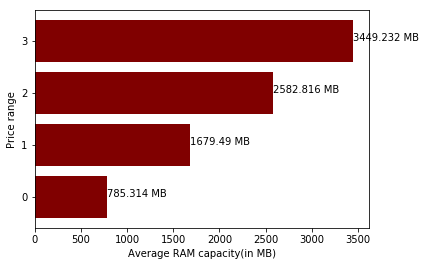

In [11]:
#we get the average ram capacity in each range using the appropriate conditions and plot them in a bar graph
ram0=train_data[train_data.price_range==0]['ram'].mean()
ram1=train_data[train_data.price_range==1]['ram'].mean()
ram2=train_data[train_data.price_range==2]['ram'].mean()
ram3=train_data[train_data.price_range==3]['ram'].mean()
xAxis=["0", "1", "2", "3"]
yAxis=[ram0, ram1, ram2, ram3]
plt.barh(xAxis, yAxis, color='maroon')
for index, value in enumerate(yAxis):
    plt.text(value, index, str(value)+" MB")
plt.xlabel("Average RAM capacity(in MB)")
plt.ylabel("Price range")
plt.show()

The difference in RAM capacity for the different ranges is very significant. The price of a mobile depends very highly on the RAM capacity. 

## Primary and Front Camera megapixels at different price ranges

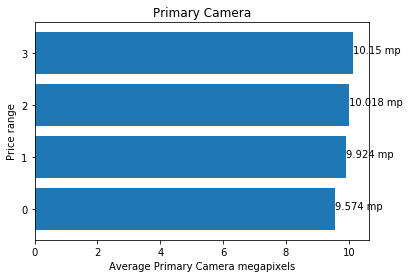

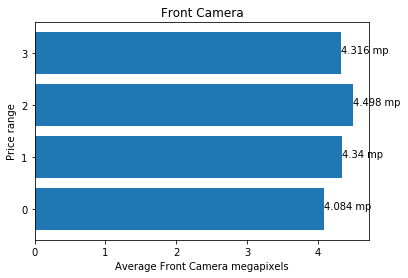

In [12]:
#we get the average primary cmaera mp and front camera mp in each range using the appropriate conditions 
#and plot them in bar graphs separately
pc0=train_data[train_data.price_range==0]['pc'].mean()
pc1=train_data[train_data.price_range==1]['pc'].mean()
pc2=train_data[train_data.price_range==2]['pc'].mean()
pc3=train_data[train_data.price_range==3]['pc'].mean()
xAxis=["0", "1", "2", "3"]
yAxis=[pc0, pc1, pc2, pc3]
plt.barh(xAxis, yAxis)
for index, value in enumerate(yAxis):
    plt.text(value, index, str(value)+" mp")
plt.title('Primary Camera')
plt.xlabel("Average Primary Camera megapixels")
plt.ylabel("Price range")
plt.show()
fc0=train_data[train_data.price_range==0]['fc'].mean()
fc1=train_data[train_data.price_range==1]['fc'].mean()
fc2=train_data[train_data.price_range==2]['fc'].mean()
fc3=train_data[train_data.price_range==3]['fc'].mean()
xAxis=["0", "1", "2", "3"]
yAxis=[fc0, fc1, fc2, fc3]
plt.barh(xAxis, yAxis)
for index, value in enumerate(yAxis):
    plt.text(value, index, str(value)+" mp")
plt.title('Front Camera')
plt.xlabel("Average Front Camera megapixels")
plt.ylabel("Price range")
plt.show()

Not much difference in the camera megapixels, because more expensive phones tend to focus on performance from the processor and GPU.

## Splitting training data to training data and test data
As we discussed earlier, the test file has no data for price range, so we have to split the training data into training data and testing data to find the accuracy of the models. We split them in a 60:40 basis. We set random state to a constant so that the result is same everytime.

In [13]:
x_data=train_data.drop("price_range", axis=1)
y_data=train_data["price_range"]
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.4, random_state=69)

## Creating different models and checking their accuracy

In [14]:
models=[]
accuracys=[]

## Linear Regression

In [15]:
linear_regression=LinearRegression()
linear_regression.fit(x_train, y_train)
models.append("Linear Regression")
accuracys.append(linear_regression.score(x_test, y_test)*100)
print("The accuracy of Linear Regression is %.2f%s" %(linear_regression.score(x_test, y_test)*100, "%"))

The accuracy of Linear Regression is 91.25%


## Logistic Regression

In [16]:
logistic_regression=LogisticRegression(solver='liblinear')
logistic_regression.fit(x_train, y_train)
models.append("Logistic Regression")
accuracys.append(logistic_regression.score(x_test, y_test)*100)
print("The accuracy of Logistic Regression is %.2f%s" %(logistic_regression.score(x_test, y_test)*100, "%"))

The accuracy of Logistic Regression is 76.25%


## Random Forest Classifier

In [17]:
random_forest=RandomForestClassifier(n_estimators=150)
random_forest.fit(x_train, y_train)
models.append("Random Forest Classifier")
accuracys.append(random_forest.score(x_test, y_test)*100)
print("The accuracy of Random Forest Classifier is %.2f%s" %(random_forest.score(x_test, y_test)*100, "%"))

The accuracy of Random Forest Classifier is 86.12%


## K Nearest Neighbours Classifier
We test the model for values of k from 4 to 20, and choose the one which is most accurate.

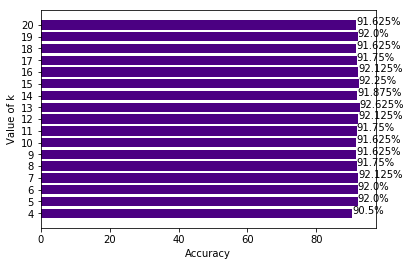

Accuracy is maximum for k =  13


In [18]:
kvalues=[]
accuracies=[]
for k in range(4, 20+1):
    k_neighbours=KNeighborsClassifier(n_neighbors=k)
    k_neighbours.fit(x_train, y_train)
    accuracies.append(k_neighbours.score(x_test, y_test)*100)
    kvalues.append(str(k))
plt.barh(kvalues, accuracies, color='indigo')
for index, value in enumerate(accuracies):
    plt.text(value, index, str(value)+"%")
plt.xlabel("Accuracy")
plt.ylabel("Value of k")
plt.show()
print('Accuracy is maximum for k = ', kvalues[accuracies.index(max(accuracies))])

In [19]:
k_neighbours=KNeighborsClassifier(n_neighbors=13)
k_neighbours.fit(x_train, y_train)
models.append("KNN Classifier")
accuracys.append(k_neighbours.score(x_test, y_test)*100)
print("The accuracy of K Neighbours Classifier is %.2f%s" %(k_neighbours.score(x_test, y_test)*100, "%"))

The accuracy of K Neighbours Classifier is 92.62%


## Graphing the accuracies

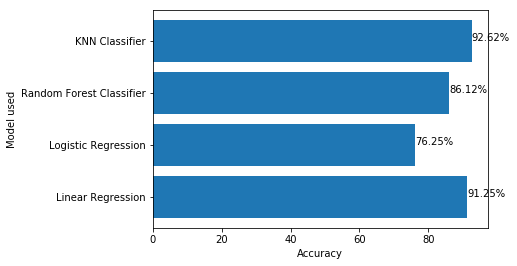

In [20]:
plt.barh(models, accuracys)
for index, value in enumerate(accuracys):
    plt.text(value, index, "{:.2f}".format(value)+"%")
plt.xlabel("Accuracy")
plt.ylabel("Model used")
plt.show()

KNN Classifier with k=13 is chosen.

## Confusion Matrix of KNN Classifier

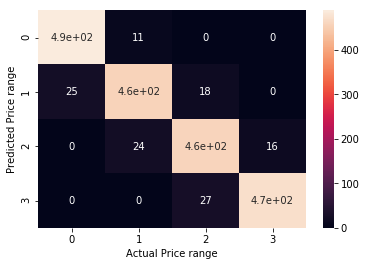

In [21]:
y_pred=k_neighbours.predict(x_data)
confusion=confusion_matrix(y_data, y_pred)
sn.heatmap(confusion, annot=True)
plt.xlabel("Actual Price range")
plt.ylabel("Predicted Price range")
plt.show()

The Confusion Matrix is heavier in the diagonals, suggesting a pretty accurate models. The few inaccuracies are 1 price range apart, since sometimes companies can choose to overprice their phone based on brand value while some companies lower prices to eliminate the competition. 

## Using the KNN Classifier model to predict price range of Test dataset

In [22]:
test_data=pd.read_csv('dataset/test.csv')
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [23]:
x_pred=test_data.drop("id", axis=1)
y_pred=k_neighbours.predict(x_pred)
test_data["price_range"]=y_pred
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


The test dataset now has a column for price range.

## Number of phones in each price range of Test dataset

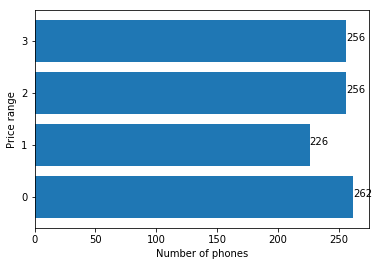

In [24]:
count0=test_data[test_data.price_range==0].shape[0]
count1=test_data[test_data.price_range==1].shape[0]
count2=test_data[test_data.price_range==2].shape[0]
count3=test_data[test_data.price_range==3].shape[0]
xAxis=["0", "1", "2", "3"]
yAxis=[count0, count1, count2, count3]
plt.barh(xAxis, yAxis)
for index, value in enumerate(yAxis):
    plt.text(value, index, str(value))
plt.xlabel("Number of phones")
plt.ylabel("Price range")
plt.show()

Very evenly distributed, again.

## RAM at different price ranges of Test dataset

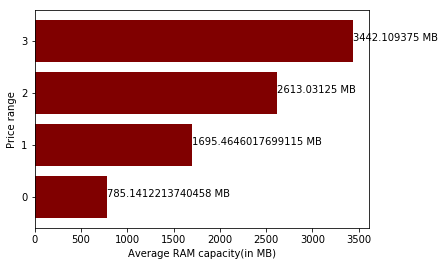

In [25]:
ram0=test_data[test_data.price_range==0]['ram'].mean()
ram1=test_data[test_data.price_range==1]['ram'].mean()
ram2=test_data[test_data.price_range==2]['ram'].mean()
ram3=test_data[test_data.price_range==3]['ram'].mean()
xAxis=["0", "1", "2", "3"]
yAxis=[ram0, ram1, ram2, ram3]
plt.barh(xAxis, yAxis, color='maroon')
for index, value in enumerate(yAxis):
    plt.text(value, index, str(value)+" MB")
plt.xlabel("Average RAM capacity(in MB)")
plt.ylabel("Price range")
plt.show()

As we established earlier, RAM capacity is very important in determining the price range of a mobile. The average RAm capacity for each price range in test dataset is almost the same as that of testing dataset, so we can safely conclude that our model is working pretty well. This dataset is a little outdated, but it can be easily applied to modern mobiles with a few additions like whether it supports 5G, number of primary and front cameras and GPU capacity. Determining the price range of a mobile is vital, since it will help people to recognize if they are receiving value for their money being spent on mobiles. It can also be tuned to suggest phones based on a price range and given features that the customer needs. Overall, the model is pretty accurate and works as expected. Here's hoping we can apply our model on an updated dataset.